In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, roc_curve, auc

import matplotlib.pyplot as plt

#Load your finance data
file_path = 'fixed_income/IGIB_2020-04-07_2022-04-06.parquet'
print(file_path)
finance_data = pd.read_parquet(file_path)
print(finance_data)

In [4]:
threshold = finance_data['CLOSE'].median()
CLOSE_CA=np.where(finance_data['CLOSE'] > threshold, 1, 0)


# Add the predicted_values column to finance_data
finance_data['CLOSE_CA'] = CLOSE_CA
print(finance_data)

        VOLUME       VW     OPEN    CLOSE    HIGHT     LOW              t  \
0        492.0  55.2914  55.2935  55.2900  55.2935  55.290  1586280780000   
1       5939.0  55.2968  55.3050  55.2902  55.3050  55.290  1586280840000   
2       6469.0  55.2896  55.2915  55.2850  55.3000  55.280  1586280900000   
3       3131.0  55.2881  55.2900  55.2900  55.2900  55.280  1586280960000   
4       1023.0  55.2956  55.2900  55.3000  55.3000  55.290  1586281020000   
...        ...      ...      ...      ...      ...     ...            ...   
164350  1557.0  53.9538  53.9500  53.9650  53.9650  53.950  1649274960000   
164351   237.0  53.9650  53.9650  53.9650  53.9650  53.965  1649275020000   
164352  1016.0  53.9656  53.9650  53.9700  53.9700  53.965  1649275080000   
164353  5304.0  53.9714  53.9700  53.9600  53.9800  53.960  1649275140000   
164354  1186.0  54.0063  54.4600  54.4600  54.4600  54.460  1649275800000   

        TRANSACTIONS        a     op                DATE  CLOSE_CA  
0     

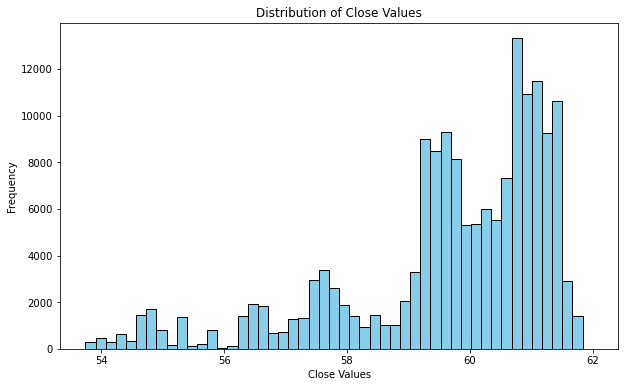

In [5]:
close_values = finance_data['CLOSE']

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(close_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Values')
plt.xlabel('Close Values')
plt.ylabel('Frequency')
plt.show()

In [6]:
finance_data.fillna(0)

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,a,op,DATE,CLOSE_CA
0,492.0,55.2914,55.2935,55.2900,55.2935,55.290,1586280780000,4,0.0000,0.00,2020-04-07 17:33:00,0
1,5939.0,55.2968,55.3050,55.2902,55.3050,55.290,1586280840000,40,0.0000,0.00,2020-04-07 17:34:00,0
2,6469.0,55.2896,55.2915,55.2850,55.3000,55.280,1586280900000,66,0.0000,0.00,2020-04-07 17:35:00,0
3,3131.0,55.2881,55.2900,55.2900,55.2900,55.280,1586280960000,9,0.0000,0.00,2020-04-07 17:36:00,0
4,1023.0,55.2956,55.2900,55.3000,55.3000,55.290,1586281020000,8,0.0000,0.00,2020-04-07 17:37:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
164350,1557.0,53.9538,53.9500,53.9650,53.9650,53.950,1649274960000,17,53.9151,53.84,2022-04-06 19:56:00,0
164351,237.0,53.9650,53.9650,53.9650,53.9650,53.965,1649275020000,4,53.9151,53.84,2022-04-06 19:57:00,0
164352,1016.0,53.9656,53.9650,53.9700,53.9700,53.965,1649275080000,11,53.9151,53.84,2022-04-06 19:58:00,0
164353,5304.0,53.9714,53.9700,53.9600,53.9800,53.960,1649275140000,34,53.9152,53.84,2022-04-06 19:59:00,0


In [7]:
print(finance_data['a'].isnull().sum())
finance_data['a'].fillna(finance_data['a'].mean(), inplace=True)
finance_data['op'].fillna(finance_data['op'].mean(), inplace=True)



163232


In [ ]:
# Assuming 'close' is the target variable
target_column = 'CLOSE_CA'

# Features
features = ['VOLUME', 'VW', 'OPEN', 'HIGHT','LOW', 'TRANSACTIONS','a','op']

# Split the data into features (X) and target variable (y)
X = finance_data[features]
y = finance_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importance (coefficients) from the trained model
feature_importance = model.coef_[0]
print("Feature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
predictions = model.predict(X_test)

print(pd.Series(predictions).value_counts())
y_test_reset_index = y_test.reset_index(drop=True)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot predictions against actual values
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.show()


In [8]:
column_data_type = finance_data['CLOSE_CA'].dtype
finance_data.CLOSE_CA.unique()

array([0, 1])

In [14]:
unique_values = np.unique(predictions)

print("Unique Values:", unique_values)

Unique Values: [0 1]


In [15]:
Finance_data= pd.concat([X_test,y_test], axis=1) 

In [16]:
def calculate_confusion_matrix(actual, predicted):
    classes = np.unique(actual)
    num_classes = len(classes)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        for j in range(num_classes):
            confusion_matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confusion_matrix, classes

In [17]:
# Assuming you have a function to calculate accuracy, precision, recall, and F1-score
def calculate_metrics(conf_matrix):
    num_classes = len(conf_matrix)
    metrics = {}

    for i in range(num_classes):
        true_positive = conf_matrix[i, i]
        false_positive = np.sum(conf_matrix[:, i]) - true_positive
        false_negative = np.sum(conf_matrix[i, :]) - true_positive

        accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * (precision * recall) / (precision + recall)

        metrics[classes[i]] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score
        }

    return metrics

In [18]:
result_df = pd.DataFrame({'VOLUME': X_test['VOLUME'], 'VW': X_test['VW'],'OPEN': X_test['OPEN'], 'Actual_Label': y_test, 'Predicted_Label': predictions})

In [19]:
finance_data=result_df

print(finance_data)


         VOLUME       VW     OPEN  Actual_Label  Predicted_Label
122601   5568.0  59.8343  59.8350             0                0
159001   1543.0  55.2754  55.2800             0                0
95115   25096.0  60.0437  60.0500             0                0
63837     995.0  61.4006  61.4066             1                1
161174   6794.0  54.4547  54.4600             0                0
...         ...      ...      ...           ...              ...
30526     403.0  60.9300  60.9300             1                1
162231    526.0  55.0052  55.0050             0                0
147395   1522.0  57.7749  57.7750             0                0
26792    2950.0  61.4702  61.4750             1                1
122466   2415.0  59.8595  59.8600             0                0

[49307 rows x 5 columns]


In [20]:
# Print instances where predicted and actual values differ
mismatch_indices = y_test_reset_index.index[y_test_reset_index != predictions]
if len(mismatch_indices) > 0:
    mismatch_df = pd.DataFrame({'Actual': y_test_reset_index.loc[mismatch_indices], 'Predicted': predictions[mismatch_indices], 'Index': mismatch_indices})
    print("Instances with Mismatched Predictions:")
    print(mismatch_df)
    
else:
    print("No Mismatched Predictions")


Instances with Mismatched Predictions:
       Actual  Predicted  Index
233         0          1    233
3337        0          1   3337
4007        0          1   4007
4723        0          1   4723
4838        0          1   4838
...       ...        ...    ...
47582       0          1  47582
47610       0          1  47610
48468       0          1  48468
48584       0          1  48584
48962       0          1  48962

[69 rows x 3 columns]


In [21]:
column_data_type = finance_data['Actual_Label'].dtype


In [22]:
column_data_type = finance_data['Predicted_Label'].dtype


In [23]:
# Assuming you have a function to preprocess the data and obtain actual and predicted values
actual_values = finance_data['Actual_Label']
predicted_values = finance_data['Predicted_Label']

# Calculate the confusion matrix
conf_matrix, classes = calculate_confusion_matrix(actual_values, predicted_values)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[24479    69]
 [    0 24759]]



Metrics:

Class: 0
Accuracy: 0.9986006043766605
Precision: 1.0
Recall: 0.9971891803812938
F1-Score: 0.9985926122340751

Class: 1
Accuracy: 0.9986006043766605
Precision: 0.9972208796520058
Recall: 1.0
F1-Score: 0.9986085062617217


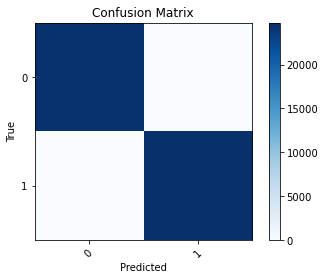

In [24]:
# Calculate and display metrics
metrics = calculate_metrics(conf_matrix)
print("\nMetrics:")
for class_name, metrics_dict in metrics.items():
    print(f"\nClass: {class_name}")
    for metric_name, value in metrics_dict.items():
        print(f"{metric_name}: {value}")

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\HARSHIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


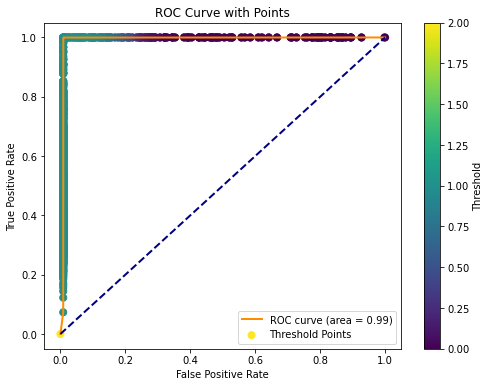

In [25]:
# Evaluate the model
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve with points
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', label='Threshold Points', s=50)
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Points')
plt.legend()
plt.show()